In [1]:
%matplotlib widget
import sys, time
sys.path.append( '../src' ) # path where source is
from CBT_lib import * # main lib
from matplotlib import pyplot as plt
import numpy as np

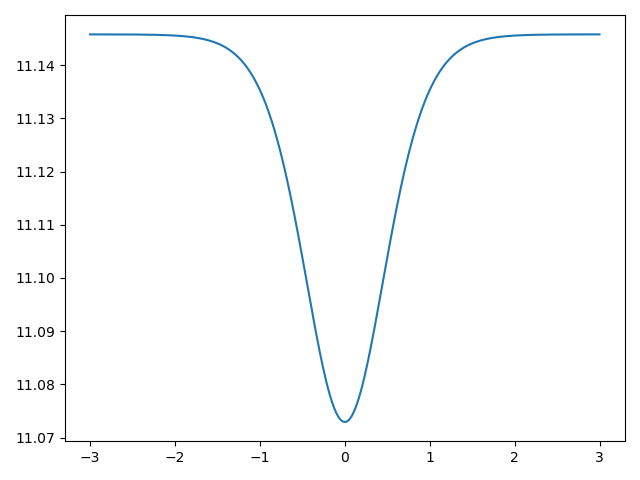

In [11]:
parallel_arrays = 3  # arrays parallel    
N_junctions=12        # junctions in each array
excitation = 5e-6/N_junctions  # excitation of measurement
island_size_init=400.0 #x 1e-15 m3, island size for heating calculations
R_T = 22.430e3 # tunnelling resistance
C_sigma = 236.140e-15 # C_sigma

sigma = 0.2e9 # electron-phonon couling constant
N = 2 # junctions in calculation
const_P = 100e-18

# function to calculate resistance as a function of temperature with above parameters

T = 0.2
Vs = np.linspace(-3E-3, 3E-3, 500)
Gs = np.zeros(len(Vs))

for i, V in enumerate(Vs):
    Gs[i] = calc_G(sigma,N,V* (N/N_junctions),R_T,C_sigma,T,island_size_init, const_P, excitation)*parallel_arrays/N_junctions*N


# plot results
fig, ax = plt.subplots()
ax.plot(Vs*1E3, Gs*1E6)
fig.tight_layout()

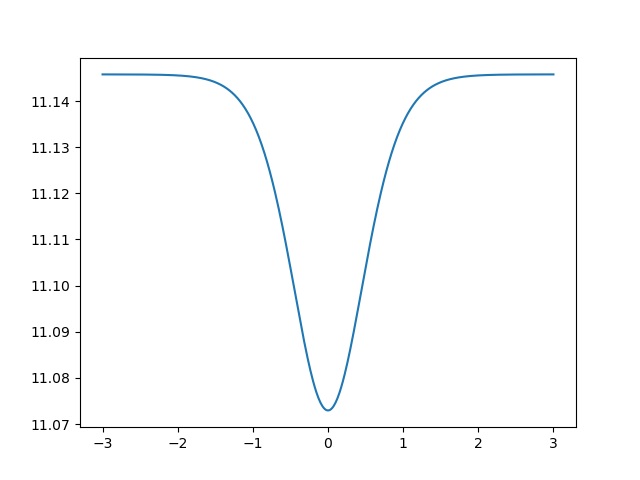

In [13]:
fig, ax = plt.subplots()
G = np.array(calc_conductance_curve_full(sigma,N,Vs * (N/N_junctions),R_T,C_sigma,T,island_size_init))*parallel_arrays/N_junctions*N
ax.plot(Vs*1E3, G*1E6)